In [1]:
from datetime import datetime
import os
import tempfile
from glob import glob
from pathlib import Path
this_path = Path().resolve()
import torch
import monai
import torchmetrics

import pandas as pd
import torchio as tio
import pytorch_lightning as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yaml

from dataset.hmri_dataset import HMRIControlsDataModule

2023-03-17 12:55:13,556 - Created a temporary directory at /tmp/tmpo14_u2v4
2023-03-17 12:55:13,557 - Writing /tmp/tmpo14_u2v4/_remote_module_non_scriptable.py


#### dev

In [ ]:
net = monai.networks.nets.AutoEncoder(spatial_dims=3,
                                        in_channels=1,      
                                        out_channels=1,
                                        channels=(16, 32, 64),
                                        strides=(2, 2, 2),
                                        norm='BATCH',
                                        bias=False)
net

In [7]:
net.decode.decode_2.conv.add_module('adn', monai.networks.blocks.ADN('NDA', 1, act='sigmoid'))

In [2]:
root_dir = Path('/mnt/scratch/7TPD/mpm_run_acu/bids/derivatives/hMRI')
md_df = pd.read_csv(this_path/'bids_3t.csv')
md_df_hc = md_df[md_df['group'] == 0]
# (md_df_hc)

In [7]:
# root_dir = Path('/mnt/scratch/7TPD/mpm_run_acu/bids/derivatives/hMRI')
# subj_dir = root_dir / md_df_hc['id'][0] / 'Results'
# lists = sorted(list(subj_dir.glob('*w_masked.nii')), key=lambda x: x.stem)
# maps = ['MTsat', 'R1']
# lists = [x for x in lists if any(sub in x.stem for sub in maps)]

In [3]:
with open('config_patches.yaml', 'r') as f:
        cfg = list(yaml.load_all(f, yaml.SafeLoader))[0]

augmentations = tio.Compose([])

data = HMRIControlsDataModule(md_df=md_df_hc,
                        root_dir=root_dir,
                        augment=augmentations,
                        **cfg['dataset'])
data.prepare_data()
data.setup()

In [4]:
dl = data.train_dataloader()
for batch in dl:
    inputs = batch['image'][tio.DATA]
    break
print(inputs.shape)

torch.Size([9, 1, 64, 64, 64])


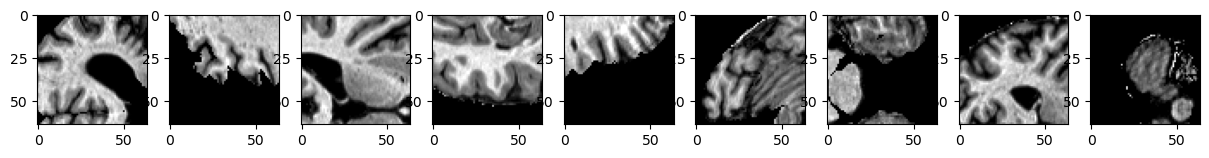

In [6]:
f,axs = plt.subplots(1,inputs.shape[0], figsize=(15, 3))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(inputs[i].cpu().detach().numpy()[0, :, :, 32], cmap='gray')